In [23]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

In [24]:
diamonds = pd.read_csv('diamonds2.csv')
diamonds

,carat,cut,color,clarity,depth,table,x,y,z,Decision
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Buy
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Buy
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Buy
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Buy
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Buy
...,...,...,...,...,...,...,...,...,...,...
20995,1.02,Ideal,F,VVS2,61.9,57.0,6.53,6.42,4.01,Don’t buy
20996,1.12,Ideal,G,VVS2,61.9,57.0,6.62,6.66,4.11,Don’t buy
20997,1.13,Ideal,G,VVS1,61.2,57.0,6.72,6.65,4.09,Don’t buy
20998,1.54,Premium,J,VVS1,62.4,59.0,7.36,7.38,4.60,Don’t buy


In [36]:
#A data set with 21000 entries and no null values
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   carat     21000 non-null  float64
 1   cut       21000 non-null  object 
 2   color     21000 non-null  object 
 3   clarity   21000 non-null  object 
 4   depth     21000 non-null  float64
 5   table     21000 non-null  float64
 6   x         21000 non-null  float64
 7   y         21000 non-null  float64
 8   z         21000 non-null  float64
 9   Decision  21000 non-null  object 
 10  Outcome   21000 non-null  int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 1.8+ MB


In [27]:
#creating a boolean outcome for buy decision

def buy(x):
    if x=="Buy":
        return 1
    else:
        return 0
#applying the function to our dataset and storing results in a new column 'Outcome'
diamonds['Outcome'] = diamonds['Decision'].apply(buy)

In [29]:
#checking it's been applied to the dataset

diamonds.sort_values(by = 'Outcome', ascending = True)

,carat,cut,color,clarity,depth,table,x,y,z,Decision,Outcome
20999,1.21,Ideal,E,VS2,62.4,54.0,6.86,6.80,4.26,Don’t buy,0
14761,1.00,Premium,G,VS2,61.6,58.0,6.39,6.43,3.95,Don’t buy,0
14762,1.00,Very Good,G,VS2,63.0,58.0,6.33,6.40,4.01,Don’t buy,0
14763,1.23,Good,I,VS1,63.6,59.0,6.85,6.76,4.33,Don’t buy,0
14764,1.00,Premium,G,VS1,62.9,55.0,6.39,6.33,4.00,Don’t buy,0
...,...,...,...,...,...,...,...,...,...,...,...
6996,1.00,Good,F,SI2,63.8,58.0,6.33,6.28,4.02,Buy,1
6995,1.00,Premium,I,VS2,62.6,59.0,6.33,6.28,3.95,Buy,1
6994,1.06,Premium,F,SI1,61.9,59.0,6.57,6.52,4.05,Buy,1
6992,1.02,Very Good,I,SI2,63.2,60.0,6.37,6.41,4.04,Buy,1


In [33]:
#understanding the shape of diamonds using describe
# width (x) and length (y) have very similar attributes: mean of 6.25 (2dp), standard deviation of 0.78 and 0.77 respectivley
#this could suggest that many diamonds in our dataset are square-like
# from the describe function we can also see that the mean Outcome in our datast is 0.59 (2dp). 
#Given outcome is 0 or 1 and the mean is above 0.5, we can infer there are more 'Buy' decisions than 'Don't Buy' decisions in our data


diamonds.describe()



,carat,depth,table,x,y,z,Outcome
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,0.971655,61.823910,57.765638,6.252641,6.251963,3.863571,0.587286
std,0.310075,1.549227,2.223610,0.781628,0.770156,0.488948,0.492334
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,0.000000
25%,0.830000,61.100000,56.000000,6.020000,6.020000,3.720000,0.000000
50%,1.010000,61.900000,58.000000,6.410000,6.410000,3.970000,1.000000
75%,1.120000,62.700000,59.000000,6.690000,6.680000,4.120000,1.000000
max,3.010000,71.800000,70.000000,9.230000,9.100000,5.970000,1.000000


In [100]:
#when sorting the values by Carat, the 10 highest carat diamonds were not bought
diamonds.sort_values(by = 'carat', ascending = False).head(10)


,carat,cut,color,clarity,depth,table,x,y,z,Decision,Outcome,cut_no,color_no,clarity_no
19339,3.01,Premium,I,I1,62.7,58.0,9.10,8.97,5.67,Don’t buy,0,3,1,0
16283,3.00,Very Good,H,I1,63.1,55.0,9.23,9.10,5.77,Don’t buy,0,2,2,0
19346,3.00,Fair,H,I1,67.1,57.0,8.93,8.84,5.97,Don’t buy,0,0,2,0
20462,2.74,Fair,J,I1,64.9,61.0,8.76,8.66,5.65,Don’t buy,0,0,0,0
17196,2.72,Fair,J,I1,68.2,56.0,8.46,8.43,5.76,Don’t buy,0,0,0,0
19866,2.68,Premium,G,I1,58.6,60.0,9.11,9.07,5.33,Don’t buy,0,3,3,0
19921,2.50,Premium,H,I1,59.9,60.0,8.75,8.67,5.22,Don’t buy,0,3,2,0
20297,2.50,Fair,G,I1,65.1,59.0,8.55,8.39,5.53,Don’t buy,0,0,3,0
19081,2.50,Fair,G,I1,64.7,57.0,8.48,8.44,5.47,Don’t buy,0,0,3,0
15684,2.49,Fair,J,I1,66.3,58.0,8.26,8.18,5.45,Don’t buy,0,0,0,0


In [92]:
#using a pearson correlation test to observe the correlations between the numerical variables in our dataset
#we can observe there is a high correlation between the width and the length of the diamond
diamonds[['carat', 'depth', 'table', 'x', 'y', 'z','Outcome']].corr()

,carat,depth,table,x,y,z,Outcome
carat,1.000000,0.047138,0.127547,0.969115,0.967597,0.958043,-0.589410
depth,0.047138,1.000000,-0.278923,-0.053887,-0.058847,0.144813,0.023539
table,0.127547,-0.278923,1.000000,0.134869,0.125963,0.070557,0.003031
x,0.969115,-0.053887,0.134869,1.000000,0.994741,0.966577,-0.551162
y,0.967597,-0.058847,0.125963,0.994741,1.000000,0.963804,-0.554581
z,0.958043,0.144813,0.070557,0.966577,0.963804,1.000000,-0.538137
Outcome,-0.589410,0.023539,0.003031,-0.551162,-0.554581,-0.538137,1.000000


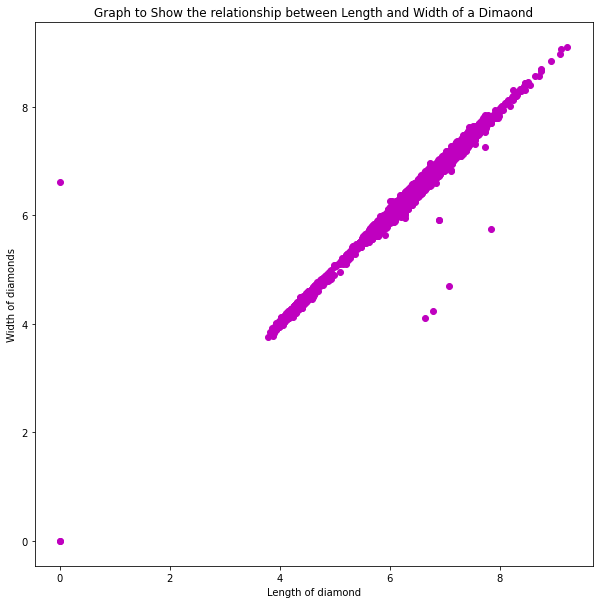

In [103]:
#plotting length and width of the diamond in a scatter plot

plt.figure(figsize = (10,10))
plt.scatter(diamonds['x'], diamonds['y'], color = "m")
plt.xlabel("Length of diamond")
plt.ylabel("Width of diamonds")
plt.title("Graph to Show the relationship between Length and Width of a Dimaond");




In [106]:
#plotting a linear line
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

#defining independent (x)  variable and dependent variable (y) of our models
X = diamonds[['x']]
Y = diamonds[['y']]

#fitting our model
model1.fit(X, Y)
    
Y_pred = model1.predict(X)


diamonds["y_pred"] = Y_pred 


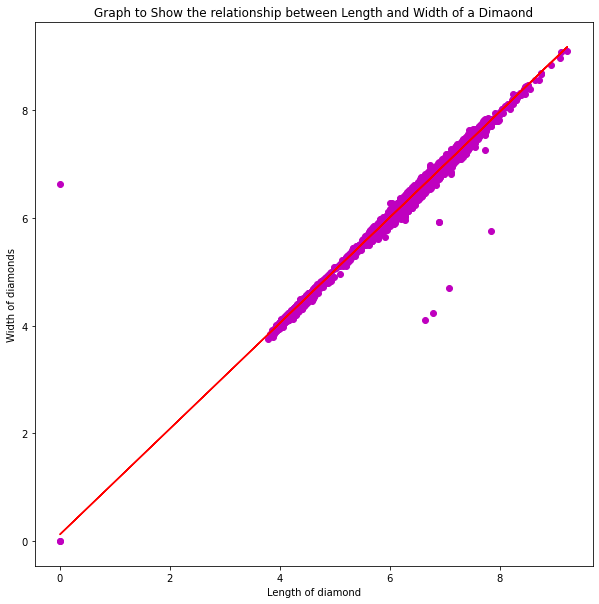

In [107]:
#adding back the line to our scatter plot, we can see that the line fits our data well

plt.figure(figsize = (10,10))
plt.scatter(diamonds['x'], diamonds['y'], color = "m")

plt.plot(diamonds['x'], diamonds['y_pred'], color='red')
plt.xlabel("Length of diamond")
plt.ylabel("Width of diamonds")
plt.title("Graph to Show the relationship between Length and Width of a Dimaond");


In [108]:
#this was further strengthened by a very high R2 which implies that 99% of variation in the data can be explained by our model

print(model1.score(X, Y))

0.9895101975407836


In [109]:
#from our correlation we can also see x,y,z are highly correlated with carat

#creating a multivariate OLS regression model with our data

model2 = LinearRegression()



#defining independent (x)  variable and dependent variable (y) of our models
X2 = diamonds[['x', 'y', 'z']]
Y2 = diamonds[['carat']]

#splitting into test and train
from sklearn.model_selection import train_test_split                
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, random_state= 42)


model2.fit(X2_train, Y2_train)

    
carat_pred = model2.predict(X2_test)





In [111]:
#assessing how good our model is using MSE, RMSE and R2. 
#RMSE was 0.07 which suggests the square root of average squared distance between the prediction and the correct answer was low (and much lower than our STD of 0.31).
#R2 of 0.94 further strengthened the implication our model for predicting carat was a good fit for the data : 94% of variation in carat data is explained by our model.
from sklearn.metrics import mean_squared_error

print((mean_squared_error(Y2_test, carat_pred)))
print(np.sqrt(mean_squared_error(Y2_test, carat_pred)))
print(model2.score(X2_test, Y2_test))

0.0055451455537653465
0.07446573409136142
0.9404681568787996


In [31]:
#Finding the unique diamond cut values in our dataset and the number of diamonds in our data points defined in each
#we can see from the data the most common cut type is 'Ideal', followed by "Premium". 
#This data could suggest that this is a high-end diamond store given the frequency of diamonds stocked is positively associated with cut quality. 
#In other words, the highest quality cut is the most frequent cut in the dataset, the lowest quality is the lowest frequency in the dataset.

diamonds['cut'].value_counts()


Ideal        6835
Premium      5799
Very Good    5162
Good         2370
Fair          834
Name: cut, dtype: int64

In [114]:
#filtering by diamonds that were bought, we see a similar positive relationship between cut qulaity and frequency in the dataset
#this suggests customers are sensitive to cut type when making buying decisions
bought = diamonds[diamonds['Outcome'] == 1]

bought['cut'].value_counts()

Ideal        3946
Very Good    3132
Premium      3127
Good         1562
Fair          566
Name: cut, dtype: int64

In [112]:
#Finding the mean attributes of carat, table and depth according to cut type to get a sense of how cut affects other diamond attributes
#We can see that the Ideal cut has the lowest average carat and table as well as second lowest average depth (just after Premium). 
#The lowest quality cut, Fair, has the highest carat, largest depth and second highest table. 


diamonds.groupby(['cut']).agg({'carat': 'mean', 'table': 'mean', 'depth': 'mean'})

,carat,table,depth
cut,,,
Fair,1.139736,58.825779,64.246763
Good,0.981903,58.907004,62.424979
Ideal,0.920696,56.135216,61.712495
Premium,1.025649,58.730729,61.322935
Very Good,0.946610,58.144983,61.866815


In [41]:
#finding the unique values for color
diamonds['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [32]:
#finding how many datapoints are in each color

diamonds['color'].value_counts()

G    4195
H    3812
F    3608
E    3249
D    2395
I    2335
J    1406
Name: color, dtype: int64

In [40]:
#finding the the unique definitions of diamond clarity and the number of diamonds in each
diamonds['clarity'].value_counts()

SI1     5846
SI2     5145
VS2     4537
VS1     2950
VVS2    1211
VVS1     644
I1       435
IF       232
Name: clarity, dtype: int64

In [59]:
#numerising color for further analysis, I first created an array of the different colours
color_arr = diamonds['color'].unique()
#turning array into list
color_list = color_arr.tolist()
#sorting alphabetically backwards
color_ordered = sorted(color_list, reverse = True)

#creating dictionary
dictOfcolor = { i : color_ordered[i] for i in range(0, len(color_ordered)) }

#inverting key and values (so that letter = a value now)
new_dict = {}
for k, v in dictOfcolor.items():
    new_dict[v] = k

new_dict

{'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}

In [60]:
#inputting the dictionary into a new mapping

diamonds['color_no'] = diamonds['color'].map({'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6})


In [61]:
#numerising other varibales clarity and cut. Where applicable 0 is worse and higher values are better.


diamonds['cut_no'] = diamonds['cut'].map({"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4})
diamonds['clarity_no'] = diamonds['clarity'].map({"I1":0, "SI2":1, "SI1":2, "VS2":3, "VS1":4, "VVS2": 5, "VVS1": 6, "IF":7})



In [62]:
#viewing the data to check it has been applied
diamonds.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,Decision,Outcome,cut_no,color_no,clarity_no
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Buy,1,4,5,1
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Buy,1,3,5,2
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Buy,1,1,5,4
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Buy,1,3,1,3
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Buy,1,1,0,1
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,Buy,1,2,0,5
6,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47,Buy,1,2,1,6
7,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53,Buy,1,2,2,2
8,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49,Buy,1,0,5,3
9,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39,Buy,1,2,2,4


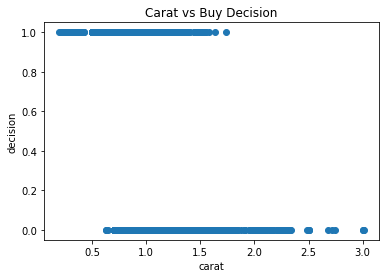

In [69]:
#observing the relationship between carat and the decision to buy
plt.scatter(diamonds["carat"], diamonds["Outcome"])
 
plt.xlabel("carat")
plt.ylabel("decision")
plt.title("Carat vs Buy Decision");


In [81]:
#using logistic regression to predict buy decision


diamonds.sort_values(by="carat", ascending = True, inplace = True)

Xo1= diamonds[["carat"]]
Yo1 = diamonds[["Outcome"]]

#Import
from sklearn.linear_model import LogisticRegression

#Instantiate
lor = LogisticRegression()

#Fit the model
#lor1.fit(Xo1,Yo1)
lor.fit(Xo1,Yo1.values.ravel())

# Model quality
print(lor.score(Xo1, Yo1))

#Predict the model
lor_pred = lor.predict(Xo1)



0.7730476190476191


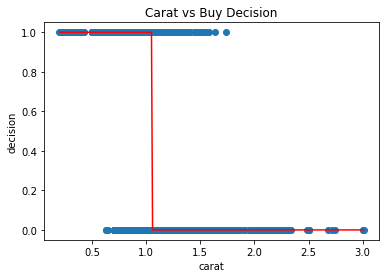

In [82]:

#visualising the relationship between carat and the decision to buy 
plt.scatter(diamonds["carat"], diamonds["Outcome"])
plt.plot(diamonds["carat"], lor_pred, color='red') #added line 
plt.xlabel("carat")
plt.ylabel("decision")
plt.title("Carat vs Buy Decision");



In [ ]:
#The R2 of 0.77 (2dp) suggests that this model is a good fit for our data, with 77% of variation in a buy decision can be explained by carat
#We can also observe a negative relationship between carat and Buy Decision. Preriit is more likely to buy a diamond the lower the carat. 
#Below 1 carat, Preriit is more likely to buy the diamond. Above 1 carat, Preriit is less likely to buy a diamond.

In [83]:
#using a multivariate logistic regression model to assess the relationship between a buy decision and carat, cut, color and clarity

import statsmodels.api as sm
import pylab as pl

Xo2 = diamonds[['carat', "cut_no", "color_no", "clarity_no"]]

logit = sm.Logit(diamonds["Outcome"],Xo2)

result1 = logit.fit()

print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.611016
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20996
Method:                           MLE   Df Model:                            3
Date:                Sat, 18 Jun 2022   Pseudo R-squ.:                 0.09857
Time:                        15:34:30   Log-Likelihood:                -12831.
converged:                       True   LL-Null:                       -14234.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
carat         -1.6420      0.036    -45.207      0.000      -1.713      -1.571
cut_no         0.3139      0.

In [115]:
#In our previous model we could see that clarity has a P value> 0.05. 
#This implies the null hypothesis of no relationship between clarity and buy decision can not be rejected at a 95% confidence level
#Rerunning the model without clarity as a variable

import statsmodels.api as sm
import pylab as pl

Xo3 = diamonds[['carat', "cut_no", "color_no"]]

logit2 = sm.Logit(diamonds["Outcome"],Xo3)

result2 = logit2.fit()

print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.611020
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20997
Method:                           MLE   Df Model:                            2
Date:                Sun, 19 Jun 2022   Pseudo R-squ.:                 0.09857
Time:                        16:34:31   Log-Likelihood:                -12831.
converged:                       True   LL-Null:                       -14234.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
carat         -1.6442      0.036    -45.723      0.000      -1.715      -1.574
cut_no         0.3120      0.

In [122]:
import math

print(math.exp(-1.6442))
print(math.exp(0.312))
print(math.exp(0.2884))

0.1931670346244905
1.36615469302948
1.3342909137598464


In [ ]:
#The model above shows that the null hypothesis of no relationship between carat, cut and color and the log-odds of Buying a diamond can be rejected at a 99.9% confidence level
#Holding all other variables constant, a 1-unit increase in the carat of a diamond, reduces the log odds of buying a diamond by 1.6442 ie. reduces the probability of purchase by 19%
#Holding all other variables constant, a 1-unit increase in the cut (ie. moving up one category of cut quality to the one above), reduces the log odds of buying a diamon by 0.3120 ie. increases the probability of buying a diamon by 36.6%.
#Holding all other variables constant, a 1-unit increase in the color (ie. moving up one category of color to the superior colour category above), reduces the log odds of buying a diamon by 0.2884 ie. increases of buying a dimond by 33.4%.
#McFadden's Pseudo R-Squared shows there is some predictive power in our model (with 0 being none and 1 being perfect prediction). Whilst this has not improved from the model above we can still infer that our model is good (not quite excellent) at predicting the log-odds of purchasing a diamond.
#In order to assess the likelihood of whether Preriit will buy a diamond, he should input the features of the diamond he would like to buy to this mdoel.
#this model suggests suggests that lower carats and higher cut and color qualities to increase the probability Preriit will purchase a diamond. 